<a href="https://colab.research.google.com/github/pra11chit/practical_deep_learning/blob/master/mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.4MB/s 
     |████████████████████████████████| 194kB 12.6MB/s 
     |████████████████████████████████| 1.0MB 21.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 40kB 5.7MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 2.6MB 45.1MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [6]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[:, :])
df.style.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

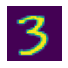

In [13]:
show_image(three_tensors[1])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [15]:
stacked_threes.shape
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [16]:
stacked_threes.ndim

3

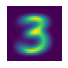

In [17]:
mean3 = stacked_threes.mean(0) #dimension along 6131
show_image(mean3);

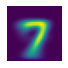

In [18]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

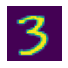

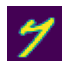

In [19]:
a_3 = stacked_threes[1]
show_image(a_3)
a_7 = stacked_sevens[1]
show_image(a_7)

In [20]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [21]:
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqr = ((a_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [22]:
#Let's create tensors of validation set
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [23]:
#function to calculate mean absolute distance between two images
def mnist_distance(a, b) : return (a-b).abs().mean((-1, -2))
mnist_distance(a_3, mean3)
mnist_distance(valid_3_tens[0], mean3)


tensor(0.1323)

In [24]:
# To calculate mean absolute distance or l1 for all images
valid_3_dist = mnist_distance(valid_3_tens, mean3)
# Here mean3 is broadcastd to rank 3 tensor and then subtracted. As we have provide mean((-1, 2)), only last 2 rows are considered for mean
valid_3_dist, valid_3_dist.shape

(tensor([0.1323, 0.1368, 0.1365,  ..., 0.1244, 0.1063, 0.1587]),
 torch.Size([1010]))

In [25]:
def is_3(x) : return mnist_distance(x, mean3) < mnist_distance(x, mean7)
is_3(a_3)

tensor(True)

In [26]:
# Accuracies
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [27]:
# Average accuracy
(accuracy_3s + accuracy_7s)/2

tensor(0.9511)

In [28]:
#MNIST Loss Function
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28) # converts rank 3 tensor to rank 2, -1 stands for let the first dimesion be as much as the data wants, 28*28 for second dimension

In [29]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [30]:
  dset = list(zip(train_x, train_y))
  #len(dset)
  x, y = dset[0]
  

In [31]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [32]:
# 1. Initialize
def init_params(size, std = 1.0) : return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))
weights.shape

torch.Size([784, 1])

In [33]:
bias = init_params(1)
bias.shape

torch.Size([1])

In [56]:
  # matrix multiplication
  def linear1(xb) : return xb@weights + bias# @ represents matrix multi
  preds = linear1(train_x)
  preds.shape

torch.Size([12396, 1])

In [35]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [36]:
tensor(1).shape

torch.Size([])

In [37]:
trgts = tensor([1, 0, 1])
prds = tensor([0.9, 0.4, 0.2])
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [38]:
(trgts-prds).abs()

tensor([0.1000, 0.4000, 0.8000])

In [39]:
def mnist_loss(predictions, targets) : 
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [40]:
# Sigmoid function - always outputs between 0 and 1
def sigmoid(x) : return 1/(1 + torch.exp(-x))

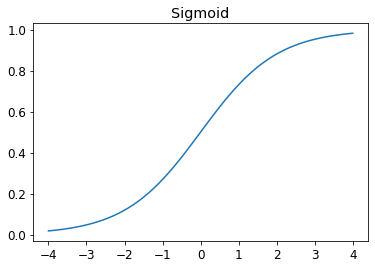

In [41]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [42]:
prds.sigmoid()

tensor([0.7109, 0.5987, 0.5498])

In [102]:
# Mini Batch
# DataLoader
coll = range(15)
dl = DataLoader(coll, batch_size = 5, shuffle = True)
list(dl)

[tensor([ 0,  7,  4,  5, 11]),
 tensor([ 9,  3,  8, 14,  6]),
 tensor([12,  2,  1, 10, 13])]

In [103]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [104]:
dl = DataLoader(ds, batch_size = 6, shuffle=True)
list(dl)

[(tensor([ 6, 14, 12, 15, 24, 11]), ('g', 'o', 'm', 'p', 'y', 'l')),
 (tensor([ 0, 16,  2, 18, 25, 21]), ('a', 'q', 'c', 's', 'z', 'v')),
 (tensor([ 8,  7, 19, 23,  1,  9]), ('i', 'h', 't', 'x', 'b', 'j')),
 (tensor([ 4, 13, 10,  5,  3, 17]), ('e', 'n', 'k', 'f', 'd', 'r')),
 (tensor([22, 20]), ('w', 'u'))]

In [105]:
weights = init_params((28*28, 1))
bias = init_params(1)
weights.shape

torch.Size([784, 1])

In [106]:
  dl = DataLoader(dset, batch_size = 256)
  xb, yb = first(dl)

In [107]:
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [108]:
valid_dl = DataLoader(valid_dset, batch_size = 256)

In [109]:
# mini batch for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [110]:
preds = linear1(batch)
preds

tensor([[ 2.4931],
        [-3.6898],
        [ 3.5233],
        [ 3.4936]], grad_fn=<AddBackward0>)

In [111]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.2775, grad_fn=<MeanBackward0>)

In [112]:
loss.backward()

In [113]:
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0056), tensor([-0.0377]))

In [114]:
def calc_grad(xb, yb, model) :
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [115]:
weights.grad.zero_()
bias.grad.zero_()
# as the .backward() adds the gradient to previous value stored at .grad

tensor([0.])

In [116]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0056), tensor([-0.0377]))

In [169]:
def train_epoch(model, lr, params) :
  for xb, yb in dl :
    calc_grad(xb, yb, model)
    for p in params :
      p.data -= p.grad*lr
      p.grad.zero_()

In [170]:
(preds > 0.0).float() == train_y[:4]

tensor([[ True],
        [False],
        [ True],
        [ True]])

In [171]:
def batch_accuracy(xb, yb) :
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [172]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [173]:
def validate_epoch(model) :
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [174]:
validate_epoch(linear1)

0.9814

In [175]:
# train for one more epoch and check if accuracy increases
lr = 0.5
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9819

In [176]:
for i in range(20) :
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end='\n')

0.9819
0.9819
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823
0.9823


In [177]:
# Creating an optimizer
linear_model = nn.Linear(28*28, 1)
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [178]:
class BasicOptim :
  def __init__(self, params, lr) : self.params, self.lr = list(params), lr
  
  def step(self, *args, **kwargs) : 
    for p in self.params : p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs) :
    for p in self.params : p.grad = None

opt = BasicOptim(linear_model.parameters(), lr)

def train_epoch1(model) :
  for xb, yb in dl:
    calc_grad(xb, yb, model);
    opt.step()
    opt.zero_grad()

validate_epoch(linear_model)


0.5192

In [179]:
def train_model(model, epochs) :
  for i in range(epochs) :
    train_epoch1(model)
    print(validate_epoch(model), end = ' ')

In [180]:
train_model(linear_model, 20)

0.5225 0.8232 0.9126 0.9365 0.9502 0.9599 0.9653 0.9677 0.9692 0.9706 0.9721 0.9736 0.9745 0.976 0.9765 0.9765 0.9765 0.977 0.977 0.978 